In [2]:
from pandas import Series, DataFrame
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, suppress=True)

In [105]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [106]:
pd.options.display.notebook_repr_html = False

In [107]:
%matplotlib inline

In [3]:
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randn(5),
                'data2' : np.random.randn(5)})
df

,data1,data2,key1,key2
0,1.514971,1.218922,a,one
1,0.661986,-0.182137,a,two
2,-0.228961,-0.898116,b,one
3,0.248316,0.565537,b,two
4,1.563930,-0.563334,a,one


In [4]:
grouped = df['data1'].groupby(df['key1'])

In [5]:
grouped

In [6]:
grouped.mean()

key1
a    0.675064
b    0.163449
Name: data1, dtype: float64

In [36]:
means = df[['data1']].groupby([df['key1'],df['key2']]).mean()
means

data1
key1 key2          
a    one   0.692501
     two   0.640190
b    one  -0.533237
     two   0.860136

In [9]:
means.unstack()

key2,one,two
key1,,
a,0.692501,0.640190
b,-0.533237,0.860136


In [10]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

California  2005    0.640190
            2006   -0.533237
Ohio        2005    0.858942
            2006    0.527255
Name: data1, dtype: float64

In [11]:
df

,data1,data2,key1,key2
0,0.857748,-0.429429,a,one
1,0.640190,-0.291872,a,two
2,-0.533237,-0.675809,b,one
3,0.860136,-0.109106,b,two
4,0.527255,1.108950,a,one


In [12]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.675064,0.129216
b,0.163449,-0.392457


In [13]:
df.groupby(['key1','key2']).mean()

data1     data2
key1 key2                    
a    one   0.692501  0.339761
     two   0.640190 -0.291872
b    one  -0.533237 -0.675809
     two   0.860136 -0.109106

In [14]:
df.groupby(['key1','key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [16]:
for name,group in df.groupby('key1'):
    print (name)
    print (group)

a
      data1     data2 key1 key2
0  0.857748 -0.429429    a  one
1  0.640190 -0.291872    a  two
4  0.527255  1.108950    a  one
b
      data1     data2 key1 key2
2 -0.533237 -0.675809    b  one
3  0.860136 -0.109106    b  two


In [22]:
for (k1,k2),group in df.groupby(['key1','key2']) :
    print((k1,k2))
    print(group)

('a', 'one')
      data1     data2 key1 key2
0  0.857748 -0.429429    a  one
4  0.527255  1.108950    a  one
('a', 'two')
     data1     data2 key1 key2
1  0.64019 -0.291872    a  two
('b', 'one')
      data1     data2 key1 key2
2 -0.533237 -0.675809    b  one
('b', 'two')
      data1     data2 key1 key2
3  0.860136 -0.109106    b  two


In [23]:
pieces = dict(list(df.groupby('key1')))

In [24]:
pieces

{'a':       data1     data2 key1 key2
 0  0.857748 -0.429429    a  one
 1  0.640190 -0.291872    a  two
 4  0.527255  1.108950    a  one, 'b':       data1     data2 key1 key2
 2 -0.533237 -0.675809    b  one
 3  0.860136 -0.109106    b  two}

In [25]:
pieces['b']

,data1,data2,key1,key2
2,-0.533237,-0.675809,b,one
3,0.860136,-0.109106,b,two


In [26]:
df.dtypes

data1    float64
data2    float64
key1      object
key2      object
dtype: object

In [27]:
df

,data1,data2,key1,key2
0,0.857748,-0.429429,a,one
1,0.640190,-0.291872,a,two
2,-0.533237,-0.675809,b,one
3,0.860136,-0.109106,b,two
4,0.527255,1.108950,a,one


In [28]:
grouped = df.groupby(df.dtypes,axis = 1)

In [29]:
dict(list(grouped))

{dtype('float64'):       data1     data2
 0  0.857748 -0.429429
 1  0.640190 -0.291872
 2 -0.533237 -0.675809
 3  0.860136 -0.109106
 4  0.527255  1.108950, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

In [30]:
df

,data1,data2,key1,key2
0,0.857748,-0.429429,a,one
1,0.640190,-0.291872,a,two
2,-0.533237,-0.675809,b,one
3,0.860136,-0.109106,b,two
4,0.527255,1.108950,a,one


In [32]:
df.groupby('key1')['data1']
df['data1'].groupby(df['key1'])

In [34]:
df.groupby('key1')[['data2']]
df[['data2']].groupby(df['key1'])

In [35]:
df.groupby(['key1','key2'])[['data2']].mean()

data2
key1 key2          
a    one   0.339761
     two  -0.291872
b    one  -0.675809
     two  -0.109106

In [43]:
s_grouped = df.groupby(['key1','key2'])['data2']

In [44]:
s_grouped

In [45]:
s_grouped.mean()

key1  key2
a     one     0.339761
      two    -0.291872
b     one    -0.675809
      two    -0.109106
Name: data2, dtype: float64

In [4]:
people = DataFrame(np.random.randn(5, 5),
                   columns=['a', 'b', 'c', 'd', 'e'],
                   index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people

,a,b,c,d,e
Joe,1.083398,0.144207,0.550357,1.985400,-0.448436
Steve,2.236613,0.594878,-1.091124,0.501895,-0.729369
Wes,-0.703536,0.479679,-0.225205,-0.184148,-2.115601
Jim,-0.255825,-1.491749,-0.630871,1.479592,0.409845
Travis,0.090290,0.181585,1.024245,-0.936955,-0.933235


In [47]:
people.ix[2:3, ['b', 'c']] = np.nan # Add a few NA values
people

,a,b,c,d,e
Joe,0.300569,0.547655,-0.900791,-0.216546,0.308987
Steve,-0.174153,-1.198455,1.827271,1.085333,-1.783856
Wes,0.464191,NaN,NaN,0.021052,1.342322
Jim,-1.159787,-0.568280,0.825295,-1.900569,-0.139405
Travis,1.144094,-0.184423,0.167022,0.667451,-0.407924


In [48]:
mapping = {'a':'red','b':'red','c':'blue','d':'blue','e':'red','f':'orange'}

In [49]:
by_column = people.groupby(mapping,axis=1)

In [50]:
by_column.sum()

,blue,red
Joe,-1.117337,1.157212
Steve,2.912604,-3.156463
Wes,0.021052,1.806513
Jim,-1.075275,-1.867472
Travis,0.834474,0.551747


In [51]:
map_series = Series(mapping)

In [52]:
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [56]:
people.groupby(map_series,axis = 1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


In [63]:
people.groupby(len).sum()

,a,b,c,d,e
3,-0.395027,-0.020625,-0.075496,-2.096063,1.511905
5,-0.174153,-1.198455,1.827271,1.085333,-1.783856
6,1.144094,-0.184423,0.167022,0.667451,-0.407924


In [62]:
people.index

Index(['Joe', 'Steve', 'Wes', 'Jim', 'Travis'], dtype='object')

In [64]:
key_list = ['one','one','one','two','two']

In [65]:
people.groupby([len,key_list]).min()

a         b         c         d         e
3 one  0.300569  0.547655 -0.900791 -0.216546  0.308987
  two -1.159787 -0.568280  0.825295 -1.900569 -0.139405
5 one -0.174153 -1.198455  1.827271  1.085333 -1.783856
6 two  1.144094 -0.184423  0.167022  0.667451 -0.407924

In [66]:
people

,a,b,c,d,e
Joe,0.300569,0.547655,-0.900791,-0.216546,0.308987
Steve,-0.174153,-1.198455,1.827271,1.085333,-1.783856
Wes,0.464191,NaN,NaN,0.021052,1.342322
Jim,-1.159787,-0.568280,0.825295,-1.900569,-0.139405
Travis,1.144094,-0.184423,0.167022,0.667451,-0.407924


In [67]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]], names=['cty', 'tenor'])
hier_df = DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      1.470540 -0.307160  1.847614 -0.663870  0.334237
1     -0.985320  0.450028 -0.317010  2.024232  0.386119
2      0.582496  1.278414 -0.511116 -0.840603  0.343185
3     -1.999791  1.269344 -0.222012 -0.259192  1.584873

In [68]:
hier_df.groupby(level='cty',axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


In [69]:
columns

MultiIndex(levels=[['JP', 'US'], [1, 3, 5]],
           labels=[[1, 1, 1, 0, 0], [0, 1, 2, 0, 1]],
           names=['cty', 'tenor'])

In [70]:
df

,data1,data2,key1,key2
0,0.857748,-0.429429,a,one
1,0.640190,-0.291872,a,two
2,-0.533237,-0.675809,b,one
3,0.860136,-0.109106,b,two
4,0.527255,1.108950,a,one


In [71]:
grouped = df.groupby('key1')

In [74]:
grouped['data1'].quantile(0.9)

key1
a    0.814236
b    0.720799
Name: data1, dtype: float64

In [75]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [76]:
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,0.330493,1.538379
b,1.393374,0.566703


In [77]:
grouped.describe()

data1     data2
key1                          
a    count  3.000000  3.000000
     mean   0.675064  0.129216
     std    0.167984  0.851257
     min    0.527255 -0.429429
     25%    0.583722 -0.360651
     50%    0.640190 -0.291872
     75%    0.748969  0.408539
     max    0.857748  1.108950
b    count  2.000000  2.000000
     mean   0.163449 -0.392457
     std    0.985264  0.400720
     min   -0.533237 -0.675809
     25%   -0.184894 -0.534133
     50%    0.163449 -0.392457
     75%    0.511793 -0.250782
     max    0.860136 -0.109106

In [31]:
tips = pd.read_csv('tips.csv',dtype='object')

In [32]:
tips[['total_bill','tip','size']] = tips[['total_bill','tip','size']].astype(np.float32)

In [33]:
tips['tip_pct'] = tips['tip']/tips['total_bill']

In [34]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [99]:
grouped = tips.groupby(['sex','smoker'])

In [103]:
grouped_pct = grouped['tip_pct']

In [109]:
grouped_pct.agg('mean')

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float32

In [110]:
grouped_pct.mean()

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float32

In [111]:
grouped_pct.agg(['mean','std',peak_to_peak])

mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707

In [112]:
grouped_pct.agg([('foo','mean'),('bar',np.std)])

foo       bar
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

In [113]:
functions = ['count','mean','max']

In [121]:
result = grouped[['tip_pct','total_bill']].agg(functions)

In [122]:
result

tip_pct                     total_bill                      
                count      mean       max      count       mean        max
sex    smoker                                                             
Female No          54  0.156921  0.252672         54  18.105185  35.830002
       Yes         33  0.182150  0.416667         33  17.977879  44.299999
Male   No          97  0.160669  0.291990         97  19.791237  48.330002
       Yes         60  0.152771  0.710345         60  22.284500  50.810001

In [124]:
result['tip_pct']

count      mean       max
sex    smoker                           
Female No         54  0.156921  0.252672
       Yes        33  0.182150  0.416667
Male   No         97  0.160669  0.291990
       Yes        60  0.152771  0.710345

In [125]:
ftuples = [('Durchschnitt','mean'),('Abweichung',np.var)]

In [126]:
grouped['tip_pct','total_bill'].agg(ftuples)

tip_pct              total_bill           
              Durchschnitt Abweichung Durchschnitt Abweichung
sex    smoker                                                
Female No         0.156921   0.001327    18.105185  53.092422
       Yes        0.182150   0.005126    17.977879  84.451515
Male   No         0.160669   0.001751    19.791237  76.152962
       Yes        0.152771   0.008206    22.284500  98.244675

In [138]:
grouped.agg({'tip':np.max,'size':'sum'})

tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150

In [139]:
grouped.agg({'tip_pct':['min','max','mean','std'],
                         'size':'sum'})

tip_pct                               size
                    min       max      mean       std  sum
sex    smoker                                             
Female No      0.056797  0.252672  0.156921  0.036421  140
       Yes     0.056433  0.416667  0.182150  0.071595   74
Male   No      0.071804  0.291990  0.160669  0.041849  263
       Yes     0.035638  0.710345  0.152771  0.090588  150

In [141]:
tips.groupby(['sex','smoker'],as_index=False).mean()

,sex,smoker,total_bill,tip,size,tip_pct
0,Female,No,18.105185,2.773519,2.592592,0.156921
1,Female,Yes,17.977879,2.931515,2.242424,0.182150
2,Male,No,19.791237,3.113402,2.711340,0.160669
3,Male,Yes,22.284500,3.051167,2.500000,0.152771


In [142]:
df

,data1,data2,key1,key2
0,0.857748,-0.429429,a,one
1,0.640190,-0.291872,a,two
2,-0.533237,-0.675809,b,one
3,0.860136,-0.109106,b,two
4,0.527255,1.108950,a,one


In [143]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')

In [144]:
k1_means

,mean_data1,mean_data2
key1,,
a,0.675064,0.129216
b,0.163449,-0.392457


In [145]:
pd.merge(df,k1_means,left_on='key1',right_index=True)

,data1,data2,key1,key2,mean_data1,mean_data2
0,0.857748,-0.429429,a,one,0.675064,0.129216
1,0.640190,-0.291872,a,two,0.675064,0.129216
4,0.527255,1.108950,a,one,0.675064,0.129216
2,-0.533237,-0.675809,b,one,0.163449,-0.392457
3,0.860136,-0.109106,b,two,0.163449,-0.392457


In [146]:
key = ['one','two','one','two','one']

In [147]:
people

,a,b,c,d,e
Joe,0.300569,0.547655,-0.900791,-0.216546,0.308987
Steve,-0.174153,-1.198455,1.827271,1.085333,-1.783856
Wes,0.464191,NaN,NaN,0.021052,1.342322
Jim,-1.159787,-0.568280,0.825295,-1.900569,-0.139405
Travis,1.144094,-0.184423,0.167022,0.667451,-0.407924


In [148]:
people.groupby(key).mean()

,a,b,c,d,e
one,0.636285,0.181616,-0.366884,0.157319,0.414462
two,-0.666970,-0.883367,1.326283,-0.407618,-0.961630


In [149]:
people.groupby(key).transform(np.mean)

,a,b,c,d,e
Joe,0.636285,0.181616,-0.366884,0.157319,0.414462
Steve,-0.666970,-0.883367,1.326283,-0.407618,-0.961630
Wes,0.636285,0.181616,-0.366884,0.157319,0.414462
Jim,-0.666970,-0.883367,1.326283,-0.407618,-0.961630
Travis,0.636285,0.181616,-0.366884,0.157319,0.414462


In [150]:
def demean(arr):
    return arr - arr.mean()

In [151]:
demeaned = people.groupby(key).transform(demean)

In [152]:
demeaned

,a,b,c,d,e
Joe,-0.335716,0.366039,-0.533907,-0.373865,-0.105475
Steve,0.492817,-0.315088,0.500988,1.492951,-0.822225
Wes,-0.172094,NaN,NaN,-0.136267,0.927861
Jim,-0.492817,0.315088,-0.500988,-1.492951,0.822225
Travis,0.507809,-0.366039,0.533907,0.510132,-0.822386


In [153]:
demeaned.groupby(key).mean()

,a,b,c,d,e
one,3.700743e-17,-2.775558e-17,0,0,3.700743e-17
two,-5.551115e-17,0.000000e+00,0,0,0.000000e+00


In [158]:
def top(df,n=5,column= 'tip_pct'):
    return df.sort_values(by=column)[-n:]

In [159]:
top(tips,n=6)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [160]:
tips.groupby('smoker').apply(top)

total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88    24.709999  5.85    Male     No  Thur   Lunch     2  0.236746
       185   20.690001  5.00    Male     No   Sun  Dinner     5  0.241663
       51    10.290000  2.60  Female     No   Sun  Dinner     2  0.252672
       149    7.510000  2.00    Male     No  Thur   Lunch     2  0.266312
       232   11.610000  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109   14.310000  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183   23.170000  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67     3.070000  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178    9.600000  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172    7.250000  5.15    Male    Yes   Sun  Dinner     2  0.710345

In [161]:
tips.groupby(['smoker','day']).apply(top,n=1,column='total_bill')

total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94    22.750000   3.25  Female     No   Fri  Dinner     2   
       Sat  212   48.330002   9.00    Male     No   Sat  Dinner     4   
       Sun  156   48.169998   5.00    Male     No   Sun  Dinner     6   
       Thur 142   41.189999   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  95    40.169998   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170   50.810001  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182   45.349998   3.50    Male    Yes   Sun  Dinner     3   
       Thur 197   43.110001   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799  
       Thur 142  0.121389  
Yes    Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
       Thur 197  0.115982

In [162]:
result = tips.groupby('smoker')['tip_pct'].describe()

In [163]:
result

smoker       
No      count    151.000000
        mean       0.159329
        std        0.039910
        min        0.056797
        25%        0.136906
        50%        0.155625
        75%        0.185014
        max        0.291990
Yes     count     93.000000
        mean       0.163196
        std        0.085119
        min        0.035638
        25%        0.106771
        50%        0.153846
        75%        0.195059
        max        0.710345
dtype: float64

In [164]:
result.unstack('smoker')

smoker,No,Yes
count,151.000000,93.000000
mean,0.159329,0.163196
std,0.039910,0.085119
min,0.056797,0.035638
25%,0.136906,0.106771
50%,0.155625,0.153846
75%,0.185014,0.195059
max,0.291990,0.710345


In [165]:
tips.groupby('smoker',group_keys=False).apply(top)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
88,24.709999,5.85,Male,No,Thur,Lunch,2,0.236746
185,20.690001,5.00,Male,No,Sun,Dinner,5,0.241663
51,10.290000,2.60,Female,No,Sun,Dinner,2,0.252672
149,7.510000,2.00,Male,No,Thur,Lunch,2,0.266312
232,11.610000,3.39,Male,No,Sat,Dinner,2,0.291990
109,14.310000,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.170000,6.50,Male,Yes,Sun,Dinner,4,0.280535
67,3.070000,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.600000,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.250000,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [167]:
frame = DataFrame({'data1':np.random.randn(1000),
                                     'data2':np.random.randn(1000)})
frame[:2]

,data1,data2
0,1.252024,0.719177
1,-1.125086,-0.280997


In [169]:
#cut関数はmax~minを等分
factor = pd.cut(frame.data1,4)
factor.value_counts()

(-1.374, 0.187]     495
(0.187, 1.749]      387
(-2.942, -1.374]     82
(1.749, 3.311]       36
dtype: int64

In [170]:
def get_stats(group):
    return {'min':group.min(),'max':group.max(),'count':group.count(),'mean':group.mean()}

In [171]:
grouped = frame.data2.groupby(factor)

In [173]:
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-2.942, -1.374]",82,2.930687,0.083831,-2.620151
"(-1.374, 0.187]",495,3.539513,-0.033249,-2.863937
"(0.187, 1.749]",387,2.492541,-0.039079,-2.538112
"(1.749, 3.311]",36,2.130011,-0.123298,-1.797070


In [176]:
grouping = pd.qcut(frame.data1,10,labels=False)

In [178]:
grouping[:10]

0    8
1    1
2    0
3    4
4    2
5    3
6    2
7    3
8    2
9    9
Name: data1, dtype: int64

In [179]:
grouped = frame.data2.groupby(grouping)

In [187]:
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
0,100,2.930687,0.052346,-2.620151
1,100,2.587879,0.021002,-2.454684
2,100,2.378546,-0.161166,-2.747182
3,100,1.920087,0.064052,-2.676234
4,100,2.049102,-0.094380,-2.863937
5,100,3.539513,0.048294,-2.299770
6,100,2.492541,-0.001932,-2.472866
7,100,2.220992,-0.033055,-2.477365
8,100,2.219096,-0.008896,-1.939673


In [189]:
s = Series(np.random.randn(6))

In [190]:
s[::2] = np.nan

In [191]:
s

0         NaN
1   -0.393688
2         NaN
3   -0.769010
4         NaN
5   -2.404135
dtype: float64

In [192]:
s.fillna(s.mean())

0   -1.188944
1   -0.393688
2   -1.188944
3   -0.769010
4   -1.188944
5   -2.404135
dtype: float64

In [193]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']

In [194]:
group_key = ['East']*4 + ['West']*4

In [195]:
group_key

['East', 'East', 'East', 'East', 'West', 'West', 'West', 'West']

In [197]:
data = Series(np.random.randn(8),index=states)
data

Ohio         -1.461267
New York      0.269141
Vermont      -0.375382
Florida       0.287416
Oregon       -1.592970
Nevada        1.967287
California    0.814792
Idaho        -2.431384
dtype: float64

In [200]:
data[['Vermont','Nevada','Idaho']] = np.nan
data

Ohio         -1.461267
New York      0.269141
Vermont            NaN
Florida       0.287416
Oregon       -1.592970
Nevada             NaN
California    0.814792
Idaho              NaN
dtype: float64

In [201]:
data.groupby(group_key).mean()

East   -0.301570
West   -0.389089
dtype: float64

In [203]:
fill_mean = lambda g: g.fillna(g.mean())

In [204]:
data.groupby(group_key).apply(fill_mean)

Ohio         -1.461267
New York      0.269141
Vermont      -0.301570
Florida       0.287416
Oregon       -1.592970
Nevada       -0.389089
California    0.814792
Idaho        -0.389089
dtype: float64

In [219]:
suits = ['H','S','C','D']
card_val = (list(range(1,11)) + [10]*3)*4

In [221]:
base_name = ['A'] + list(range(2,11)) +['J','Q','K']

In [223]:
cards = []
#リスト+リストの場合はextend関数
for suit in suits:
    cards.extend(str(num) + suit for num in base_name)

In [225]:
deck = Series(card_val,index=cards)

In [226]:
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
QH     10
KH     10
dtype: int64

In [230]:
len(deck)

52

In [231]:
def draw(deck,n=5):
    return deck.take(np.random.permutation(len(deck))[:n])

In [232]:
draw(deck)

QD    10
6S     6
JH    10
QS    10
3C     3
dtype: int64

In [234]:
np.random.permutation(len(deck))[:5]

array([ 6, 17, 31,  9, 22])

In [261]:
get_suit = lambda card: card[-1]

In [262]:
deck[-1]

10

In [263]:
deck.groupby(get_suit).apply(draw,n=2)

C  AC     1
   5C     5
D  2D     2
   JD    10
H  3H     3
   4H     4
S  2S     2
   9S     9
dtype: int64

In [264]:
get_suit(deck)

10

In [270]:
deck.index[0][-1]

'H'

In [267]:
deck.groupby(get_suit,group_keys=False).apply(draw,n=2)

JC    10
3C     3
KD    10
JD    10
9H     9
JH    10
2S     2
6S     6
dtype: int64

In [4]:
df = DataFrame({'category': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
                'data': np.random.randn(8),
                'weights': np.random.rand(8)})
df

,category,data,weights
0,a,0.553359,0.507108
1,a,-0.075242,0.464482
2,a,-0.619730,0.651422
3,a,0.019856,0.572463
4,b,0.613948,0.624915
5,b,-0.798257,0.700682
6,b,-1.233231,0.861221
7,b,-0.509475,0.947970


In [5]:
grouped = df.groupby('category')

In [6]:
get_wavg = lambda g: np.average(g['data'],weights=g['weights'])

In [7]:
grouped.apply(get_wavg)

category
a   -0.066807
b   -0.548908
dtype: float64

In [13]:
df['new'] = df['data']*df['weights']

In [15]:
df.groupby('category').mean()

,data,weights,new
category,,,
a,-0.030439,0.548869,-0.036669
b,-0.481754,0.783697,-0.430178


In [16]:
close_px = pd.read_csv('stock_px.csv',parse_dates = True,index_col=0)

In [18]:
close_px[-4:]

,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [19]:
rets = close_px.pct_change().dropna()

In [21]:
spx_corr = lambda x:x.corrwith(x['SPX'])
by_year = rets.groupby(lambda x:x.year)

In [24]:
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1
2004,0.374283,0.588531,0.557742,1
2005,0.467540,0.562374,0.631010,1
2006,0.428267,0.406126,0.518514,1
2007,0.508118,0.658770,0.786264,1
2008,0.681434,0.804626,0.828303,1
2009,0.707103,0.654902,0.797921,1
2010,0.710105,0.730118,0.839057,1
2011,0.691931,0.800996,0.859975,1


In [25]:
by_year.apply(lambda g:g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

In [26]:
import statsmodels.api as sm

In [27]:
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [30]:
by_year.apply(regress,'AAPL',['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


In [35]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [37]:
tips.pivot_table(index=['sex','smoker'])

size       tip   tip_pct  total_bill
sex    smoker                                          
Female No      2.592592  2.773519  0.156921   18.105185
       Yes     2.242424  2.931515  0.182150   17.977879
Male   No      2.711340  3.113402  0.160669   19.791237
       Yes     2.500000  3.051167  0.152771   22.284500

In [38]:
tips.pivot_table(['tip_pct','size'],index=['sex','day'],columns='smoker')

tip_pct                size          
smoker             No       Yes        No       Yes
sex    day                                         
Female Fri   0.165296  0.209129  2.500000  2.000000
       Sat   0.147993  0.163817  2.307692  2.200000
       Sun   0.165710  0.237075  3.071429  2.500000
       Thur  0.155971  0.163073  2.480000  2.428571
Male   Fri   0.138005  0.144730  2.000000  2.125000
       Sat   0.162132  0.139067  2.656250  2.629630
       Sun   0.158291  0.173964  2.883721  2.600000
       Thur  0.165706  0.164417  2.500000  2.300000

In [39]:
tips.pivot_table(['tip_pct','size'],index=['sex','day'],columns='smoker',margins=True)

tip_pct                          size                    
smoker             No       Yes       All        No       Yes       All
sex    day                                                             
Female Fri   0.165296  0.209129  0.199388  2.500000  2.000000  2.111111
       Sat   0.147993  0.163817  0.156470  2.307692  2.200000  2.250000
       Sun   0.165710  0.237075  0.181569  3.071429  2.500000  2.944444
       Thur  0.155971  0.163073  0.157525  2.480000  2.428571  2.468750
Male   Fri   0.138005  0.144730  0.143385  2.000000  2.125000  2.100000
       Sat   0.162132  0.139067  0.151577  2.656250  2.629630  2.644068
       Sun   0.158291  0.173964  0.162344  2.883721  2.600000  2.810345
       Thur  0.165706  0.164417  0.165276  2.500000  2.300000  2.433333
All          0.159328  0.163196  0.160803  2.668874  2.408602  2.569672

In [45]:
tips.pivot_table('tip_pct',index=['sex','smoker'],columns='day',aggfunc=len,margins=True)

day            Fri  Sat  Sun  Thur  All
sex    smoker                          
Female No        2   13   14    25   54
       Yes       7   15    4     7   33
Male   No        2   32   43    20   97
       Yes       8   27   15    10   60
All             19   87   76    62  244

In [47]:
tips.pivot_table('size',index=['time','sex','smoker'],columns='day',aggfunc='sum',fill_value=0)

day                   Fri  Sat  Sun  Thur
time   sex    smoker                     
Dinner Female No        2   30   43     2
              Yes       8   33   10     0
       Male   No        4   85  124     0
              Yes      12   71   39     0
Lunch  Female No        3    0    0    60
              Yes       6    0    0    17
       Male   No        0    0    0    50
              Yes       5    0    0    23

In [50]:
fec = pd.read_csv('P00000001-ALL.csv')

/Users/keeeeei/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [52]:
fec.ix[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [53]:
fec.columns

Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num'],
      dtype='object')

In [54]:
unique_cands = fec.cand_nm.unique()

In [55]:
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [56]:
unique_cands[2] 

'Obama, Barack'

In [57]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [58]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [59]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [60]:
#寄付先の候補者の政党のカラムを追加
fec['party'] = fec.cand_nm.map(parties)

In [61]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [139]:
dic

{'cand_nm': '寄付先候補者名',
 'contb_receipt_amt': '寄付金額',
 'contbr_city': '寄付者住所',
 'contbr_employer': '寄付者勤務先',
 'contbr_nm': '寄付者名',
 'contbr_occupation': '寄付者職業'}

In [63]:
#寄付金額が0以上のものを数える
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [64]:
#寄付金額が0以上のデータに絞る
fec = fec[fec.contb_receipt_amt>0]

In [81]:
#候補者がオバマ、ロミーのデータのみ抽出
fec_mrbo = fec.query("cand_nm in ['Obama, Barack', 'Romney, Mitt']")

In [66]:
fec_mrbo2 = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

In [140]:
dic

{'cand_nm': '寄付先候補者名',
 'contb_receipt_amt': '寄付金額',
 'contbr_city': '寄付者住所',
 'contbr_employer': '寄付者勤務先',
 'contbr_nm': '寄付者名',
 'contbr_occupation': '寄付者職業'}

In [75]:
fec_mrbo.contbr_city[fec_mrbo.contbr_city  != fec_mrbo2.contbr_city ]

8089      NaN
10060     NaN
67202     NaN
351015    NaN
356308    NaN
357016    NaN
357421    NaN
Name: contbr_city, dtype: object

In [76]:
fec_mrbo2.contbr_city[fec_mrbo.contbr_city  != fec_mrbo2.contbr_city ]

8089      NaN
10060     NaN
67202     NaN
351015    NaN
356308    NaN
357016    NaN
357421    NaN
Name: contbr_city, dtype: object

In [79]:
(fec_mrbo.contbr_city  != fec_mrbo2.contbr_city ).value_counts()

False    694275
True          7
Name: contbr_city, dtype: int64

In [68]:
len(fec_mrbo)

694282

In [69]:
len(fec_mrbo2)

694282

In [72]:
fec_mrbo.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,25,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,110,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,9.128e+07,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,9.128e+07,CISCO,ENGINEER,30,21-AUG-11,NaN,NaN,NaN,SA17A,760261,Republican
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,9.01201e+07,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100,07-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican


In [73]:
fec_mrbo2.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,25,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,110,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,9.128e+07,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,9.128e+07,CISCO,ENGINEER,30,21-AUG-11,NaN,NaN,NaN,SA17A,760261,Republican
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,9.01201e+07,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100,07-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican


In [84]:
#寄付した人の職業を数える
fec.contbr_occupation.value_counts()[:5]

RETIRED                  233990
INFORMATION REQUESTED     35107
ATTORNEY                  34286
HOMEMAKER                 29931
PHYSICIAN                 23432
Name: contbr_occupation, dtype: int64

In [91]:
#寄付した人の職業の種類
len(fec.contbr_occupation.unique())

45064

In [87]:
occ_mapping = {'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
                             'INFORMATION REQUESTED':'NOT PROVIDED',
                             'INFORMATION REQUESTED (BEST EFFORTS)':'NOT PROVIDED',
                              'C.E.O.':'CEO'}

In [88]:
#寄付した人の職業をある程度統一
f = lambda x: occ_mapping.get(x,x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

/Users/keeeeei/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/pandas/core/generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [92]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

In [93]:
f = lambda x: emp_mapping.get(x,x)

In [94]:
#寄付した人の勤務先をある程度統一
fec.contbr_employer = fec.contbr_employer.map(f)

/Users/keeeeei/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/pandas/core/generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [96]:
#クロス集計で職業、政党ごとに寄付金額の合計を集計
by_occupation = fec.pivot_table('contb_receipt_amt',index= 'contbr_occupation',columns='party',aggfunc='sum')

In [97]:
by_occupation[:5]

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100,NaN
AREA VICE PRESIDENT,250,NaN
RESEARCH ASSOCIATE,100,NaN
TEACHER,500,NaN
THERAPIST,3900,NaN


In [99]:
#合計寄付金額が2million以上の職業を残す
over_2mm = by_occupation[by_occupation.sum(axis=1)>2000000]

In [100]:
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.430000
CEO,2075974.79,4233741.520000
CONSULTANT,2459912.71,2544725.450000
ENGINEER,951525.55,1818373.700000
EXECUTIVE,1355161.05,4138850.090000
HOMEMAKER,4248875.80,13634275.780000
INVESTOR,884133.00,2431768.920000
LAWYER,3160478.87,391224.320000
MANAGER,762883.22,1444532.370000


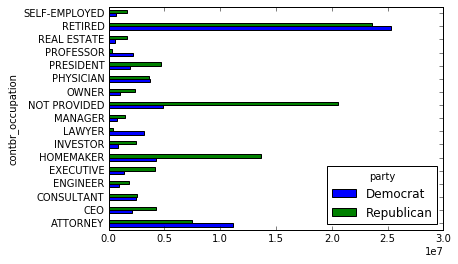

In [108]:
#図示
over_2mm.plot(kind='barh')

In [163]:
#keyでグループバイして寄付金額の合計を降順で取得
def get_top_amounts(group,key1,key2,n=5):
    totals = group.groupby([key1,key2])[['contb_receipt_amt']].sum()
    return totals.sort_values(ascending = False)[:n]

In [182]:
fec_mrbo2.groupby(['cand_nm','contbr_occupation'])[['contb_receipt_amt']].mean()

pandas.core.frame.DataFrame

In [168]:
fec_mrbo2.cand_nm.unique()

array(['Romney, Mitt', 'Obama, Barack'], dtype=object)

In [124]:
grouped.apply(get_top_amounts,'contbr_employer',n=10)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

In [126]:
bins = np.array([0,1,10,100,1000,10000,100000,1000000,10000000])

In [128]:
labels = pd.cut(fec_mrbo.contb_receipt_amt,bins)

In [183]:
grouped = fec_mrbo.groupby(['cand_nm',labels])

In [184]:
grouped.size().unstack(level=0)

cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                         493            77
(1, 10]                      40070          3681
(10, 100]                   372280         31853
(100, 1000]                 153991         43357
(1000, 10000]                22284         26186
(10000, 100000]                  2             1
(100000, 1000000]                3           NaN
(1000000, 10000000]              4           NaN

In [185]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)

In [186]:
bucket_sums

cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                      318.24         77.00
(1, 10]                  337267.62      29819.66
(10, 100]              20288981.41    1987783.76
(100, 1000]            54798531.46   22363381.69
(1000, 10000]          51753705.67   63942145.42
(10000, 100000]           59100.00      12700.00
(100000, 1000000]       1490683.08           NaN
(1000000, 10000000]     7148839.76           NaN

In [135]:
dic = {'cand_nm':'寄付先候補者名', 'contbr_nm':'寄付者名','contbr_city':'寄付者住所', 'contbr_employer':'寄付者勤務先', 
       'contbr_occupation':'寄付者職業', 'contb_receipt_amt':'寄付金額',}

In [187]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1),axis=0)

In [188]:
normed_sums

cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                    0.805182      0.194818
(1, 10]                   0.918767      0.081233
(10, 100]                 0.910769      0.089231
(100, 1000]               0.710176      0.289824
(1000, 10000]             0.447326      0.552674
(10000, 100000]           0.823120      0.176880
(100000, 1000000]         1.000000           NaN
(1000000, 10000000]       1.000000           NaN

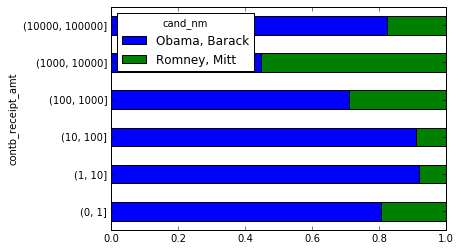

In [189]:
normed_sums[:-2].plot(kind='barh',stacked=True)

In [192]:
grouped = fec_mrbo.groupby(['cand_nm','contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals

cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AA              56405.00        135.00
AB               2048.00          0.00
AE              42973.75       5680.00
AK             281840.15      86204.24
AL             543123.48     527303.51
AP              37130.50       1655.00
AR             359247.28     105556.00
AS               2955.00          0.00
AZ            1506476.98    1888436.23
CA           23824984.24   11237636.60
CO            2132429.49    1506714.12
CT            2068291.26    3499475.45
DC            4373538.80    1025137.50
DE             336669.14      82712.00
FF                  0.00      99030.00
FL            7318178.58    8338458.81
FM                600.00          0.00
GA            2786399.49    1995725.59
GU              11581.50       3850.00
HI             795212.64     111763.00
IA             584829.10     208537.49
ID             197538.06     787158.44
IL           16443895.84    3628571.53
IN             883691.81 

In [194]:
totals = totals[totals.sum(1)>100000]
totals[:10]

cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AK             281840.15      86204.24
AL             543123.48     527303.51
AR             359247.28     105556.00
AZ            1506476.98    1888436.23
CA           23824984.24   11237636.60
CO            2132429.49    1506714.12
CT            2068291.26    3499475.45
DC            4373538.80    1025137.50
DE             336669.14      82712.00
FL            7318178.58    8338458.81

In [197]:
percent = totals.div(totals.sum(1),axis=0)

In [198]:
percent[:10]

cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AK              0.765778      0.234222
AL              0.507390      0.492610
AR              0.772902      0.227098
AZ              0.443745      0.556255
CA              0.679498      0.320502
CO              0.585970      0.414030
CT              0.371476      0.628524
DC              0.810113      0.189887
DE              0.802776      0.197224
FL              0.467417      0.532583

In [5]:
people

,a,b,c,d,e
Joe,1.083398,0.144207,0.550357,1.985400,-0.448436
Steve,2.236613,0.594878,-1.091124,0.501895,-0.729369
Wes,-0.703536,0.479679,-0.225205,-0.184148,-2.115601
Jim,-0.255825,-1.491749,-0.630871,1.479592,0.409845
Travis,0.090290,0.181585,1.024245,-0.936955,-0.933235


In [14]:
dat = DataFrame({'A':np.random.randn(4),'B':np.random.randn(4)},index = ['a','a','b','c'])
dat

,A,B
a,0.201253,-0.020075
a,0.717670,-1.526201
b,-0.048652,0.329984
c,0.613425,0.464322


In [16]:
dat.groupby(dat.index).sum()

,A,B
a,0.918923,-1.546276
b,-0.048652,0.329984
c,0.613425,0.464322


In [20]:
dat.groupby(level=0).count()

,A,B
a,2,2
b,1,1
c,1,1
